# Activity: Exploring with Visualizations

## Introduction

In this activity you will practice using Pandas functionality to create and
explore  visualizations.

This activity will cover the following topics:
- Compare single values against one another.
- Compare multiple values against one another.
- Use different methods to change how you see the data.

In [1]:
# We'll import the libraries you'll likely use for this activity
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
df = pd.read_csv('transactions-pet_store.csv')
df_orig = df.copy()

## Dataset review

In [2]:
df.head()

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Size,Quantity,Product_Category,Product_Line
0,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Feline Fix Mix,RKAPY3I1TP,39.55,NaN,1,treat,cat
1,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Scratchy Post,MPH6SCD7UT,26.95,NaN,3,toy,cat
2,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Reddy Beddy,DJWE1V9LZK,23.07,large,3,bedding,dog
3,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Snoozer Essentails,GABWVMEL2R,28.04,NaN,3,bedding,dog
4,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Reddy Beddy,KDTMPSBZKZ,13.84,small,1,bedding,dog


## Scrub

You will scrub the data. It's important that you follow the directions as
stated. Doing more or less than what is asked might lead to not getting full
points for the question.

------

If while you're working on the scrubbing phase you need to reset the DataFrame,
you can restart the kernel (in the toolbar: "Kernel" > "Restart").

#### Question 1

Remove all rows that have are missing either the `Product_Name` or the
`Product_Category`. Assign the cleaned DataFrame to the variable `df`
(overwriting the original DataFrame.).

In [3]:
# Your code here

df = df[~df["Product_Name"].isna() & ~df["Product_Category"].isna()]
#another way to solve
#df = df.dropna(subset=("Product_Name", "Product_Category"))

#### Question 2

Find any clearly "incorrect" values in the `Price` column and "clean" the
DataFrame to address those values.

Ensure you make the changes to the DataFrame assigned to the variable `df`.

In [4]:
# Your code here

df["Price"].describe()

count     2758.000000
mean        25.621632
std        535.327290
min     -19873.000000
25%         17.160000
50%         25.480000
75%         34.380000
max      19873.000000
Name: Price, dtype: float64

In [5]:
# -19973 and 19873 are outliners
df = df[(df["Price"]>0) & (df["Price"]<19873)]

#video solution
#df = df[(df["Price"]>0) & (df["Price"]<=1_000)]


#### Question 3

After you've done the cleaning above, remove any column that has more than `500`
missing values.

Ensure you make the changes to the DataFrame assigned to the variable `df`.

In [6]:
# Your code here

na_values_count = df.isna().sum() 
na_column_index = na_values_count[na_values_count > 500].index
df = df.drop(na_column_index, axis=1)

#video solution
#df = df[
#    df.drop(columns=df.columns[
#        (df.isna().sum() > 500) #boolean series
#    ])
#]

In [7]:
df.head()

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Quantity,Product_Category,Product_Line
0,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Feline Fix Mix,RKAPY3I1TP,39.55,1,treat,cat
1,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Scratchy Post,MPH6SCD7UT,26.95,3,toy,cat
2,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Reddy Beddy,DJWE1V9LZK,23.07,3,bedding,dog
3,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Snoozer Essentails,GABWVMEL2R,28.04,3,bedding,dog
4,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Reddy Beddy,KDTMPSBZKZ,13.84,1,bedding,dog


#### Question 4

Address the other missing values. You can replace the values or remvove them,
but whatever method you decide to clean the DataFrame, you should no longer have
any missing values.

Ensure you make the changes to the DataFrame assigned to the variable `df`.

In [8]:
missing_values =df[ df.isna().any(axis=1)]
missing_values

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Quantity,Product_Category,Product_Line
46,12/27/2019,79H-3431-3268-7134,NaN,Purrfect Puree,28LQOI0LSK,19.96,1,treat,cat
65,7/27/2019,0R0-5522-3689-6676,NaN,Chewie Dental,CG3531YP08,38.17,3,treat,dog
97,4/22/2020,D3I-6237-1649-0772,NaN,Tug-a-Back,IZBHF5KR79,21.82,1,toy,dog
190,8/27/2020,JU8-6095-9547-1038,NaN,Kitty Climber,W86BRJ9SSG,39.32,1,toy,cat
222,3/8/2021,TLN-8911-4517-9526,NaN,Tuna Tasties,A8SU9C4GLF,14.53,3,treat,cat
337,6/21/2021,W3P-0661-6436-1039,NaN,Tuna Tasties,A8SU9C4GLF,14.53,3,treat,cat
371,6/6/2020,WTX-0831-3244-6158,NaN,Reddy Beddy,KDTMPSBZKZ,13.84,3,bedding,dog
416,4/29/2021,X9F-5795-2281-4100,NaN,Chomp-a Plush,3HDX5H4WTM,39.24,3,toy,dog
420,7/19/2020,2OI-1191-6735-8296,NaN,Scratchy Post,MPH6SCD7UT,26.95,1,toy,cat
443,5/24/2019,7K8-7630-3319-4712,NaN,Reddy Beddy,KDTMPSBZKZ,13.84,2,bedding,dog


In [38]:
# Filling non-registered customers

df["Customer_ID"] = df["Customer_ID"].fillna("Not registered")

In [39]:
unique_customers = df.Customer_ID.nunique()
unique_customers

631

In [40]:
df["total_spend"] = df.Price * df.Quantity
highest_spender = df.groupby(["Customer_ID"]).total_spend.max().sort_values(ascending=False)
highest_spender

Customer_ID
01377bb1-c64c-40e8-903a-797c7b521e23    118.65
fdf8e8d7-b8b7-4f42-a207-3fa10ecdbad7    118.65
e8ab648d-ac25-4b4a-821c-73ea6e3f8abe    118.65
e943bc14-1378-4ab8-874c-8870a69df325    118.65
6109d989-4cc2-4b20-968f-7e3738f7f73a    118.65
                                         ...  
2de28313-a261-425a-88c5-bac36398a85e     13.84
20bc9b39-1a52-450b-a89c-b712390d079f     13.84
93ae4647-8d4a-4229-b261-168ae843236e     10.80
4d9d5f2c-a50b-4bb0-af40-806b119a28e8     10.80
6229c51d-cae8-47d1-8a43-6d8d5e896786     10.80
Name: total_spend, Length: 631, dtype: float64

In [34]:
# Number of customers that spend the most
qty_highest_spenders = int(df[df.total_spend.round(2) == 118.65]["Customer_ID"].count())
qty_highest_spenders

35

## Explore

You will explore the data. It's important that you follow the directions as
stated. Doing more or less than what is asked might lead to not getting full
points for the question.

You may use either exploratory statistics or exploratory visualizations to help
answer these questions.

------

Note that the DataFrame loaded for this section (in the below cell) is different
from the data you used in the [Scrub](#scrub) section.

If while you're working on the scrubbing phase you need to reset the DataFrame,
you can restart the kernel (in the toolbar: "Kernel" > "Restart").

In [41]:
df = pd.read_csv('transactions-pet_store-clean.csv')

#### Question 5

Create a `Subtotal` column by multiplying the `Price` and `Quantity` values. 
This represents how much was spent for a given transaction (row).

In [42]:
# Your code here

df["Subtotal"] = df["Price"]*df["Quantity"]

#### Question 6

Determine most common category (`Product_Category`) purchases (number of total
items) for both `Product_Line` categories. Assign the (string) name of these
categories to their respective variables `common_category_cat` & 
`common_category_dog`.

In [43]:
# Your code here

#df.groupby("Product_Category")["Product_Line"].count()
#df.groupby("Product_Line")["Product_Category"].count()

#
# Group by 'Product_Line' and find the most common 'Product_Category' in each group.
# The .mode() method finds the most frequent value(s) in a Series.
most_common_category_per_line = df.groupby('Product_Line')['Product_Category'].apply(lambda x: x.mode()[0])

# Assign the results to the specified variables
common_category_cat = most_common_category_per_line.loc['cat']
common_category_dog = most_common_category_per_line.loc['dog']


#video answer
#common_category_dog = (
#    df[df.Product_Line == 'dog']
#    .groupby(['Product_Category'])
#    .Quantity
#    .agg('sum')
#    .sort_values(
#        ascending=False,  # Make the most the first value
#    )
#    .index[0]  # Get the name of the category
#)
#
#common_category_cat = (
#    df[df.Product_Line == 'cat']
#    .groupby(['Product_Category'])
#    .Quantity
#    .agg('sum')
#    .sort_values(
#        ascending=False,  # Make the most the first value
#    )
#    .index[0]  # Get the name of the category
#)

#### Question 7

Determine which categories (`Product_Category`), by `Product_Line` have the
***median*** highest `Price`.
Assign the (string) name of these categories to their respective variables
`priciest_category_cat` & `priciest_category_dog`.

In [44]:
# Your code here

# Group by 'Product_Line' and 'Product_Category', and then calculate the median of 'Price'
median_prices = df.groupby(['Product_Line', 'Product_Category'])['Price'].median()

# Find the category with the highest median price for each 'Product_Line'
priciest_categories = median_prices.groupby('Product_Line').idxmax()

# Extract the category names and assign them to the variables
priciest_category_cat = priciest_categories.loc['cat'][1]
priciest_category_dog = priciest_categories.loc['dog'][1]

#video answer

#priciest_category_dog = (
#    df[df.Product_Line == 'dog']
#    .groupby(['Product_Category'])
#    .Price
#    .agg('median')
#    .sort_values(
#        ascending=False,  # Make the most the first value
#    )
#    .index[0]  # Get the name of the category
#)
#
#priciest_category_cat = (
#    df[df.Product_Line == 'cat']
#    .groupby(['Product_Category'])
#    .Price
#    .agg('median')
#    .sort_values(
#        ascending=False,  # Make the most the first value
#    )
#    .index[0]  # Get the name of the category
#)


## Modeling

This is the point of the framework where we'd work on modeling with our data.
However, in this activity, we're going to move straight to interpretting.

## Interpret

You will interpret the data based on what you found so far. It's important that
you follow the directions as stated. Doing more or less than what is asked might
lead to not getting full points for the question.


------

Note that the DataFrame loaded for this section (in the below cell) is the same
as the data you used in the [Explore](#explore) section.

If while you're working on the scrubbing phase you need to reset the DataFrame,
you can restart the kernel (in the toolbar: "Kernel" > "Restart").

#### Question 8

You want to emphasize to your stakeholders that the total number of product
categories sold differ between the two `Product_Line` categories (`'cat'` & 
`'dog'`).

Create a **_horizontal_ bar plot** that has `Product_Category` on the y-axis and
the total number of that category sold (using the `Quantity`) by each 
`Product_Line` category. Also **change the axis labels** to something meaningful
and add a title.

You will likely want to use Seaborn. Make sure you set the result to the
variable `ax` like the following:
```python
ax = # code to create a bar plot
```

C:\Users\key-i\AppData\Local\Temp\ipykernel_39696\3776787147.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x="Quantity", y="Product_Category", hue="Product_Line", estimator="sum", ci=None)


Text(0.5, 1.0, 'Total products sold by Product Category')

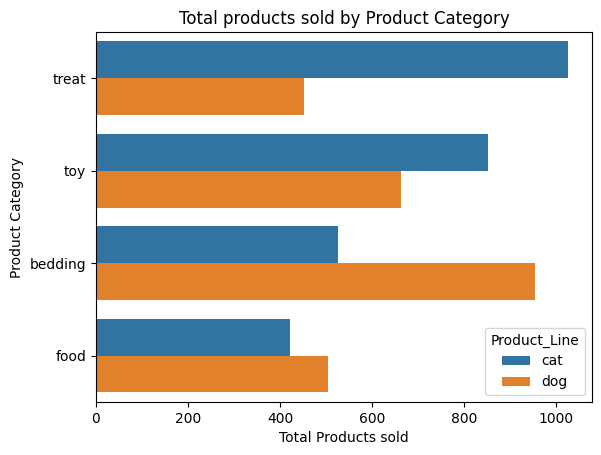

In [45]:
# Your code here

ax = sns.barplot(data=df, x="Quantity", y="Product_Category", hue="Product_Line", estimator="sum", ci=None)
ax.set_xlabel("Total Products sold")
ax.set_ylabel("Product Category")
ax.set_title("Total products sold by Product Category")

#### Question 9

Based on the plot from [Question 8](#question-8), what would you conclude for
your stakeholders about what products they should sell? What would be the
considerations and/or caveats you'd communicate to your stakeholders?

Write at least a couple sentences of your thoughts in a string assigned to the
variable `answer_to_9`.

The cell below should look something like this:
```python
answer_to_9 = '''
I think that based on the visualization that ****.
Therefore I would communicate with the stakeholders that ****
'''
```

In [46]:
# Your code here
answer_to_9 = '''
I believe that based on the visualization the toy product category is the one that sell the most for both cat and dog 
product lines.
Therefore, I would communicate to the stakeholders that they should focus on selling more bedding products to increase 
their revenue.
'''
print(len(answer_to_9))
# your code here

270


#### Question 10

The plot you created for [Question 8](#question-8) is good but could be modified
to emphasize which products are important for the business.

Create an explanatory visualization that emphasizes the insight you about the
product category. This would be a visualization you'd share with the business
stakeholders.

Make sure you set the result to the variable `ax` like the following:
```python
ax = # code to create explanatory visualization
```

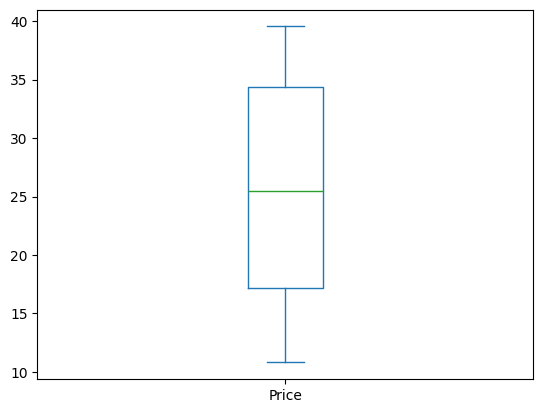

In [47]:
# Your code here
#ax = sns.barplot(data=df, x="Quantity", y="Product_Category", hue="Product_Line", estimator=sum, ci=None, color=["gray", "green", "gray", "gray"], palette=["gray", "gray", "green", "gray"])
ax = df.Price.plot.box()